# Tutorial 1:

In this tutorial, you will learn how to represent microscopic predictions for the energy per particle as function of the density.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Import the nucleardatapy package
import nucleardatapy as nuda


First, you can simply print out the models existing in the toolkit:

In [2]:
# Explore the nucleardatapy module to find the correct attribute
print(dir(nuda))

# Use the correct attribute 'matter'
models, models_lower = nuda.matter.micro_models()
print("models:", models)

['APRfit_compute', 'CST_AtmMass', 'CST_dmHc2', 'CST_dmnc2', 'CST_mHc2', 'CST_mnc2', 'CubicSpline', 'EsymLsym_constraints', 'G_cgs', 'G_si', 'HIC_Esym', 'HIC_Lsym', 'HIC_Lsym_bound', 'HIC_xgi', 'HTsl', 'HTvsl', 'ILt', 'ISt', 'KsatQsat_constraints', 'MeV2J', 'MeV2kg', 'MeVfm32dyncm2', 'MeVfm32gcm3', 'Msol_cgs', 'Msol_si', 'Nc', 'Rsol_cgs', 'Rsol_si', 'SetupNeutronSkinExp', 'SetupNeutronSkinTheo', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'astro', 'be_exp_tables', 'be_exp_versions', 'be_theo_tables', 'c', 'c2', 'checkPheno', 'col', 'compute_proba_do', 'compute_proba_up', 'conversionMBE', 'corr', 'create_folder', 'create_folder_fig', 'crust', 'crust_models', 'cst', 'curve_fit', 'days', 'den', 'den_n', 'e', 'eF_n', 'eF_n_nr', 'effg_NM_nr', 'effg_SM_nr', 'effg_nr', 'elements', 'env', 'eos', 'esymffg_nr', 'f_dp_dn', 'feden', 'five', 'fiveThird', 'flinear', 'four', 'fpres', 'fsolve', 'func_GCR_cs2', 'func_GCR_e2a', 'fu

and then loop over these models:

In [ ]:
# for model in models:
#     mic = nuda.matter.setupMicro( model = model )
#     mic.print_outputs( )

Alternatively, you can select a few of these models:

In [3]:
models = [ '1981-VAR-AM-FP', '1998-VAR-AM-APR' ]
for model in models:
    mic = nuda.matter.setupMicro( model = model )
    mic.print_outputs( )

model ->  1981-VAR-AM-FP
- Print output:
   model: 1981-VAR-AM-FP
   ref:   Friedman and Pandharipande, Nucl. Phys. A. 361, 502 (1981)
   label: FP-1981
   note:  write here notes about this EOS.
   self.sm_den:  [0.004323  0.0084434 0.01459   0.023169  0.034584  0.049242  0.067547
 0.097464  0.1257    0.15891   0.19752   0.22344   0.25154   0.27667
 0.30343   0.34974   0.39393   0.46331   0.54038   0.62555   0.82185
 1.0554    1.4048    1.8238   ]
   self.sm_effmass:  None
   den: [0.01  0.031 0.051 0.072 0.092 0.113 0.133 0.154 0.174 0.195 0.215 0.236
 0.256 0.277 0.297 0.318 0.338 0.359 0.379 0.4  ] in fm$^{-3}$
   kfn: [0.01  0.031 0.051 0.072 0.092 0.113 0.133 0.154 0.174 0.195 0.215 0.236
 0.256 0.277 0.297 0.318 0.338 0.359 0.379 0.4  ] in fm$^{-1}$
   asy: 0.0
   sm_den: [0.004 0.008 0.015 0.023 0.035 0.049 0.068 0.097 0.126 0.159 0.198 0.223
 0.252 0.277 0.303 0.35  0.394 0.463 0.54  0.626 0.822 1.055 1.405 1.824] in fm$^{-3}$
   sm_kfn: [0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1

Now, we will see how to perform a figure representing these models:

models: ['1981-VAR-AM-FP', '1998-VAR-AM-APR', '1998-VAR-AM-APR-fit', '2012-AFDMC-NM-RES-1', '2012-AFDMC-NM-RES-2', '2012-AFDMC-NM-RES-3', '2012-AFDMC-NM-RES-4', '2012-AFDMC-NM-RES-5', '2012-AFDMC-NM-RES-6', '2012-AFDMC-NM-RES-7', '2012-AFDMC-NM-FIT-1', '2012-AFDMC-NM-FIT-2', '2012-AFDMC-NM-FIT-3', '2012-AFDMC-NM-FIT-4', '2012-AFDMC-NM-FIT-5', '2012-AFDMC-NM-FIT-6', '2012-AFDMC-NM-FIT-7', '2022-AFDMC-NM', '2024-BHF-AM-2BF-Av8p', '2024-BHF-AM-2BF-Av18', '2024-BHF-AM-2BF-BONN', '2024-BHF-AM-2BF-CDBONN', '2024-BHF-AM-2BF-NSC97a', '2024-BHF-AM-2BF-NSC97b', '2024-BHF-AM-2BF-NSC97c', '2024-BHF-AM-2BF-NSC97d', '2024-BHF-AM-2BF-NSC97e', '2024-BHF-AM-2BF-NSC97f', '2024-BHF-AM-2BF-SSCV14', '2024-BHF-AM-23BF-Av8p', '2024-BHF-AM-23BF-Av18', '2024-BHF-AM-23BF-BONN', '2024-BHF-AM-23BF-CDBONN', '2024-BHF-AM-23BF-NSC97a', '2024-BHF-AM-23BF-NSC97b', '2024-BHF-AM-23BF-NSC97c', '2024-BHF-AM-23BF-NSC97d', '2024-BHF-AM-23BF-NSC97e', '2024-BHF-AM-23BF-NSC97f', '2024-BHF-AM-23BF-SSCV14', '2008-QMC-NM-swave', 

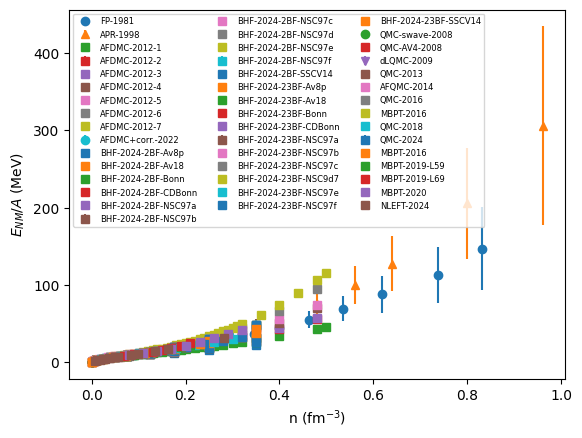

In [4]:
# %pip install matplotlib

#
# plot the results
#
plt.xlabel(r'n (fm$^{-3}$)')
plt.ylabel(r'$E_{NM}/A$ (MeV)')
models, models_lower = nuda.matter.micro_models()
print("models:",models)
for model in models:
    mic = nuda.matter.setupMicro( model = model, var2=1.0 )
    print('model:',model)
    if mic.nm_e2a is not None and 'FIT' not in model:
        plt.errorbar( mic.nm_den, mic.nm_e2a, yerr=mic.nm_e2a_err, marker=mic.marker, markevery=mic.every, linestyle='None', label=mic.label, errorevery=mic.every )
plt.legend(loc='upper left',fontsize='6', ncol=3)



Band in NM
model ->  2016-MBPT-AM
model ->  2016-QMC-NM
model ->  2020-MBPT-AM
model ->  2016-MBPT-AM
model ->  2016-QMC-NM
model ->  2020-MBPT-AM
model ->  2016-MBPT-AM
model ->  2016-QMC-NM
model ->  2020-MBPT-AM
models: ['1981-VAR-AM-FP', '1998-VAR-AM-APR', '1998-VAR-AM-APR-fit', '2012-AFDMC-NM-RES-1', '2012-AFDMC-NM-RES-2', '2012-AFDMC-NM-RES-3', '2012-AFDMC-NM-RES-4', '2012-AFDMC-NM-RES-5', '2012-AFDMC-NM-RES-6', '2012-AFDMC-NM-RES-7', '2012-AFDMC-NM-FIT-1', '2012-AFDMC-NM-FIT-2', '2012-AFDMC-NM-FIT-3', '2012-AFDMC-NM-FIT-4', '2012-AFDMC-NM-FIT-5', '2012-AFDMC-NM-FIT-6', '2012-AFDMC-NM-FIT-7', '2022-AFDMC-NM', '2024-BHF-AM-2BF-Av8p', '2024-BHF-AM-2BF-Av18', '2024-BHF-AM-2BF-BONN', '2024-BHF-AM-2BF-CDBONN', '2024-BHF-AM-2BF-NSC97a', '2024-BHF-AM-2BF-NSC97b', '2024-BHF-AM-2BF-NSC97c', '2024-BHF-AM-2BF-NSC97d', '2024-BHF-AM-2BF-NSC97e', '2024-BHF-AM-2BF-NSC97f', '2024-BHF-AM-2BF-SSCV14', '2024-BHF-AM-23BF-Av8p', '2024-BHF-AM-23BF-Av18', '2024-BHF-AM-23BF-BONN', '2024-BHF-AM-23BF-CDB

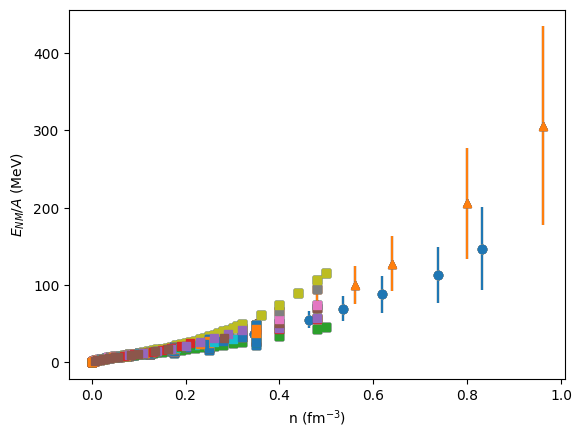

In [5]:
import matplotlib.pyplot as plt
#
# fix the uncertainty band in NM
#
bmodels = [ '2016-MBPT-AM', '2016-QMC-NM', '2020-MBPT-AM' ]
band = nuda.matter.setupMicroBand( bmodels )
#
# plot the results
#
groups = [ 'VAR', 'AFDMC', 'BHF', 'QMC', 'MBPT', 'NLEFT' ]
#
plt.xlabel(r'n (fm$^{-3}$)')
plt.ylabel(r'$E_{NM}/A$ (MeV)')
for group in enumerate(groups):
    # models, models_lower = nuda.matter.micro_models_group_NM( group )
    print("models:",models)
    for model in models:
        mic = nuda.matter.setupMicro( model = model, var2=1.0 )
        print('model:',model)
        if mic.nm_e2a is not None and 'FIT' not in model:
            plt.errorbar( mic.nm_den, mic.nm_e2a, yerr=mic.nm_e2a_err, marker=mic.marker, markevery=mic.every, linestyle='None', label=mic.label, errorevery=mic.every )
    #fill_between( band.den, y1=(band.e2a-band.e2a_std), y2=(band.e2a+band.e2a_std), color=band.color, alpha=band.alpha, visible=True )